
# Project: Medical Appointment No-Shows in Brazil


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Let's see what we are working with by assessing the data with several methods:

In [108]:
# Check the columns names and first rows
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [109]:
# Check the number of rows and columns
df.shape

(110527, 14)

In [110]:
# See some descriptive statistics for the variables
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


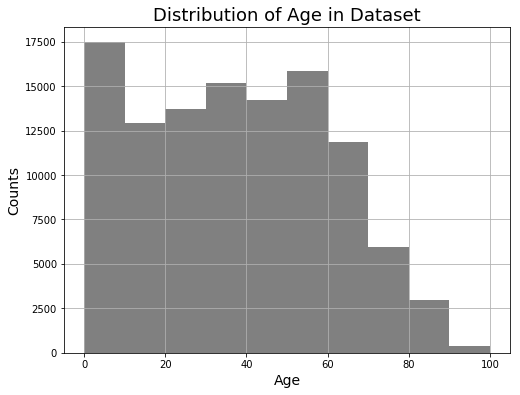

In [125]:
# Check the distribution of age in a histogram
plt.subplots(figsize=(8,6))
df.Age.hist(color="grey")
plt.title("Distribution of Age in Dataset",fontsize=18)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Counts", fontsize=14);

In [113]:
# Check datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [114]:
# Look for unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* We have 110,527 records and 14 rows in this dataset. The records are produced by the unique appointment ID's, unique patients are only half that much.
* There is at least one entry with a negative age, so we should clean that. Besides, the majority of patients is between 37 and 55 years old.
* Luckily, we don't have any missing values to handle with.
* If needed for analysis, "ScheduledDay" and "AppointmentDay" should considered to convert into data. 

### Data Cleaning

Some things have to be done before we can use the data:
* I will rename he columns and fix some spelling mistakes as well as aligning the column names.
* I will clean the age column and drop impossible ages (negative ones) and outlier ages (ages over 100 years)

In [115]:
df.rename(columns={'PatientId':'PatientID', 'Neighbourhood':'Neighborhood',
                   'Hipertension':'Hypertension', 'Handcap':'Handicap',
                   'No-show':'NoShow'}, inplace=True)

In [116]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace=True)

In [117]:
# Check if all changes are implemented
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Start: What is the proportion of No-Shows overall?

First of all I would like to know what we are talking about. How high is the No-Show rate overall?

In [118]:
# Create my variable "noshows"
noshows = df.query('NoShow == "Yes"').AppointmentID.nunique()
noshows

22316

In [119]:
# Same as above for the variable "non-noshows".
non_noshows = df.query('NoShow == "No"').AppointmentID.nunique()
non_noshows

88203

In [121]:
# Calculate the proportions ...
prop_noshows = noshows / df.shape[0]
prop_non_noshows = non_noshows / df.shape[0]
prop_noshows, prop_non_noshows

(0.2019200318497272, 0.7980799681502728)

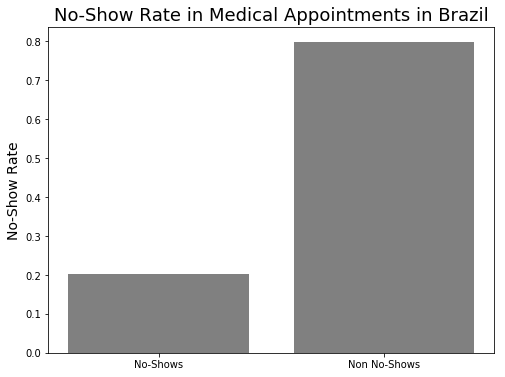

In [124]:
# ... and plot it
plt.subplots(figsize=(8,6))
plt.bar(["No-Shows", "Non No-Shows"], [prop_noshows, prop_non_noshows], color="grey")
plt.title("No-Show Rate in Medical Appointments in Brazil",fontsize=18)
plt.ylabel("No-Show Rate", fontsize=14);

20% of all medical appointments in this dataset turned into No-Shows. Given the cost of medical welfare, this is quiet a lot!

### Research Question 1: Have chronical illnesses an impact on showing up?

I could imagine that people suffering on Diabetes oder Hypertension may be more reliable with their medical appointments as they are constantly reminded on their health problems. Let's check if that is true:

In [126]:
# No-Show rate for people suffering on Hypertension
no_hyp = (len(df[(df["NoShow"]=="Yes") & (df["Hypertension"]==1)])) / (len(df.query('Hypertension==1')))
no_hyp

0.1730275229357798

In [127]:
# No-Show rate for people suffering on Diabetes
no_diab = (len(df[(df["NoShow"]=="Yes") & (df["Diabetes"]==1)])) / (len(df.query('Diabetes==1')))
no_diab

0.18003273322422259

In [128]:
# No-Show rate for people suffering on Alcoholism
no_alc = (len(df[(df["NoShow"]=="Yes") & (df["Alcoholism"]==1)])) / (len(df.query('Alcoholism==1')))
no_alc

0.20148809523809524

In [129]:
# No-Show rate for people suffering on different Handicaps
no_hand = (len(df[(df["NoShow"]=="Yes") & (df["Handicap"]==1)])) / (len(df.query('Handicap==1')))
no_hand

0.17811579980372916

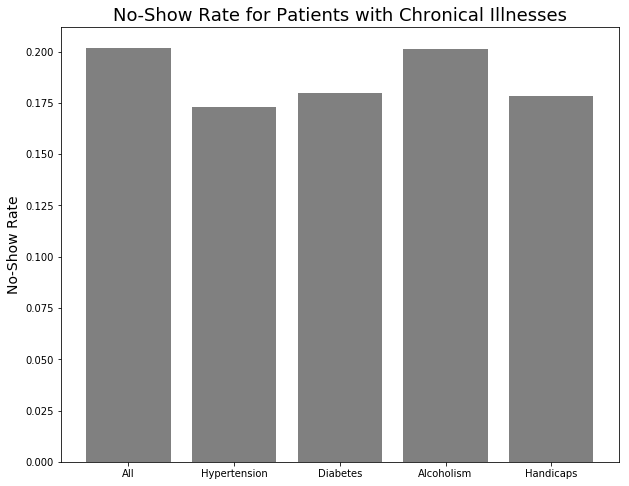

In [130]:
# Plotting a bar chart to visualize the findings
plt.subplots(figsize=(10,8))
plt.bar(["All","Hypertension", "Diabetes", "Alcoholism", "Handicaps"], [prop_noshows, no_hyp, no_diab, no_alc, no_hand], color="grey")
plt.title("No-Show Rate for Patients with Chronical Illnesses", fontsize=18)
plt.ylabel("No-Show Rate", fontsize=14);

Compared to the overall No-Show rate of 20%, patients suffering on Hypertension, Diabetes or Handicaps indeed have a lower rate of No-Show. In contrast, patients with alcohol problems have the same No-Show rate as overall.

May the reason for chronical ill patients being more reliable that these patients are more likely enrolled in welfare program "Bolsa Familia" and therefore don't have to pay extra? Let's have a look:

In [131]:
# Scholarship rate for people suffering on Hypertension
scholar_hyp = (len(df[(df["Scholarship"]==1) & (df["Hypertension"]==1)])) / (len(df.query('Hypertension==1')))
scholar_hyp

0.08642201834862386

In [132]:
# Scholarship rate for people suffering on Diabetes
scholar_diab = (len(df[(df["Scholarship"]==1) & (df["Diabetes"]==1)])) / (len(df.query('Diabetes==1')))
scholar_diab

0.07163540224096689

In [133]:
# Scholarship rate for people suffering on Handicaps
scholar_hand = (len(df[(df["Scholarship"]==1) & (df["Handicap"]==1)])) / (len(df.query('Handicap==1')))
scholar_hand

0.07850834151128558

In [134]:
# Scholarship rate for people suffering on Alcoholism
scholar_alc = (len(df[(df["Scholarship"]==1) & (df["Alcoholism"]==1)])) / (len(df.query('Alcoholism==1')))
scholar_alc

0.15714285714285714

In [135]:
# Scholarship rate for all people in the dataset
scholar_all = (len(df.query('Scholarship == 1'))) / df.shape[0]
scholar_all

0.09827269519268181

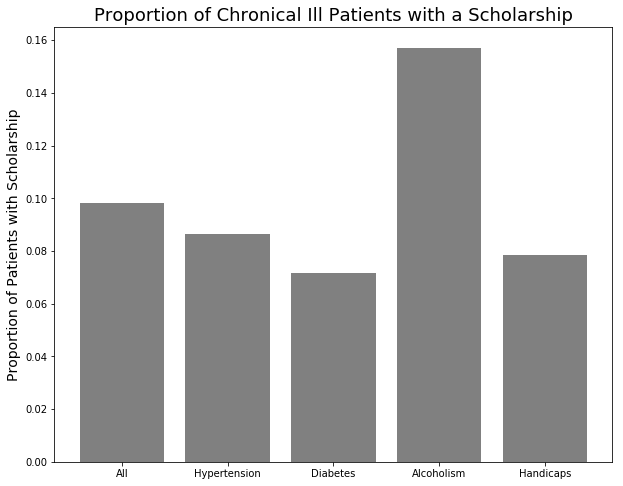

In [81]:
# Plotting a bar chart to visualize the findings
plt.subplots(figsize=(10,8))
plt.bar(["All","Hypertension", "Diabetes", "Alcoholism", "Handicaps"], [scholar_all, scholar_hyp, scholar_diab, scholar_alc, scholar_hand],color="grey")
plt.title("Proportion of Chronical Ill Patients with a Scholarship", fontsize=18)
plt.ylabel("Proportion of Patients with Scholarship", fontsize=14);

That's interesting! People with alcohol problems on the one hand are more likely to be enrolled in the welfare programm than the average (16% enrollment vs. 10%) and even double as likely enrolled than other chronical ill patients. Though "better protected", they have a No-Show rate that is as high as the average and not lower.

### Research Question 2: Have age categories an impact on showing up?

I could further imagine that children are more likely to show up as their parents are more worried about their health. Or that elderly people are also more reliable. Therefore I will create age categories and perform some analyses.

In [136]:
# View the min, 25%, 50%, 75% and max age values
df.describe().Age

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

In [137]:
# Create bin edges on the base above to cut the data into groups
bin_edges = [0.0, 18.00, 37.00, 55.00, 100.00]

In [138]:
# Create labels for the four age groups
bin_names = ["Minors", "Young_Adults", "Adults", "Seniors"]

In [139]:
# Create a new colums
df["Age_Categories"] = pd.cut(df["Age"], bin_edges, labels=bin_names)

In [140]:
# Check if this was successfully created
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Age_Categories
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Seniors
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Seniors
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Seniors
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Minors
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Seniors


In [141]:
# Check the proportion of age groups within the dataset: 
prop_minors = len(df.query('Age_Categories == "Minors"')) / df.shape[0]
prop_young = len(df.query('Age_Categories == "Young_Adults"')) / df.shape[0]
prop_adults = len(df.query('Age_Categories == "Adults"')) / df.shape[0]
prop_seniors = len(df.query('Age_Categories == "Seniors"')) / df.shape[0]
prop_minors, prop_young, prop_adults, prop_seniors

(0.2291642161076376,
 0.2465639392321682,
 0.24345135225617315,
 0.24879884906667632)

Fine, the age groups are quiet evenly distributed.
Now I plot the amount of No-Shows and Non No-Shows for each age category:

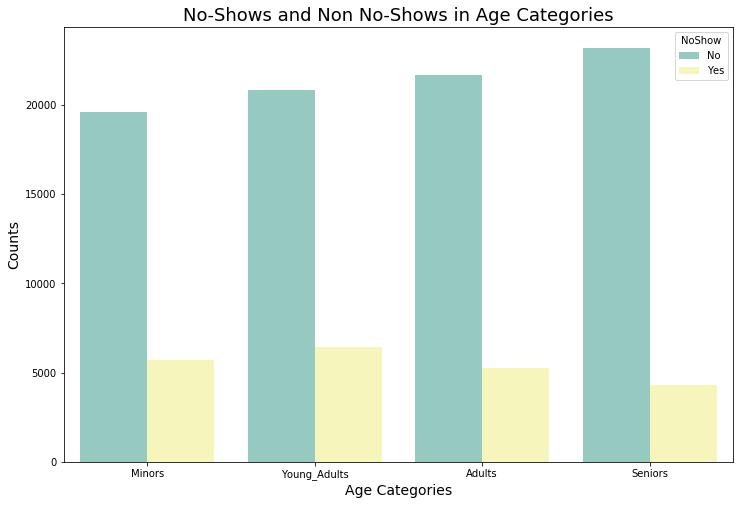

In [142]:
plt.subplots(figsize=(12,8))
g = sns.countplot(x='Age_Categories', hue='NoShow', palette="Set3", data=df)
plt.title("No-Shows and Non No-Shows in Age Categories", fontsize=18)
plt.xlabel("Age Categories", fontsize=14)
plt.ylabel("Counts", fontsize=14);
plt.show()

It looks as if the older the people get the more likely they will keep their appointment. As this is by absolute numbers, I'll check if the proportion confirm that pattern.

In [143]:
# Calculating the rate of minors who do not show up
minor_no_show = (len(df[(df["NoShow"]=="Yes") & (df["Age_Categories"]=="Minors")])) / (len(df.query('Age_Categories=="Minors"')))
minor_no_show

0.2253721325068109

In [144]:
# Calculating the rate of young adults who do not show up
young_no_show = (len(df[(df["NoShow"]=="Yes") & (df["Age_Categories"]=="Young_Adults")])) / (len(df.query('Age_Categories=="Young_Adults"')))
young_no_show

0.23537614678899083

In [145]:
# Calculating the rate of adults who do not show up
adult_no_show = (len(df[(df["NoShow"]=="Yes") & (df["Age_Categories"]=="Adults")])) / (len(df.query('Age_Categories=="Adults"')))
adult_no_show

0.1953095963725563

In [146]:
# Calculating the rate of seniors who do not show up
senior_no_show = (len(df[(df["NoShow"]=="Yes") & (df["Age_Categories"]=="Seniors")])) / (len(df.query('Age_Categories=="Seniors"')))
senior_no_show

0.15638069607593555

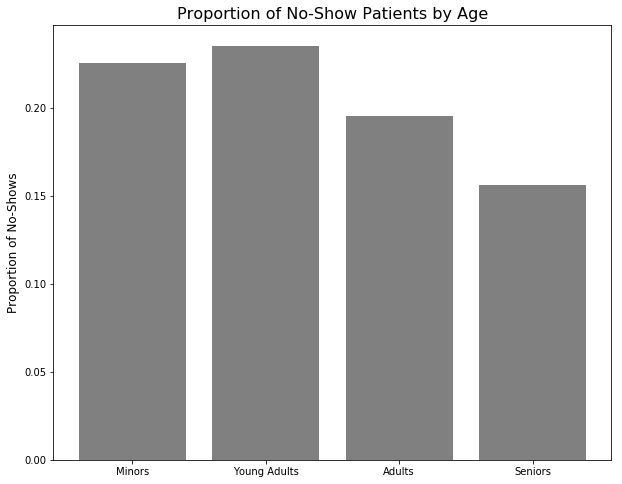

In [150]:
# and plotting also this
plt.subplots(figsize=(10,8))
plt.bar(["Minors", "Young Adults", "Adults", "Seniors"], [minor_no_show, young_no_show, adult_no_show, senior_no_show],color="grey")
plt.title("Proportion of No-Show Patients by Age", fontsize=16)
plt.ylabel("Proportion of No-Shows", fontsize=12);

This bar chart confirms the earlier finding that the older the patients the more likely they keep an appointment.

### Research Question 3: Has sending an sms any impact on showing up?

Quickly a last look at the variable "SMS_received". I'm curious to know if patients who get an sms (probably a reminder for the appointment) will be more consistent in keeping their appointment.

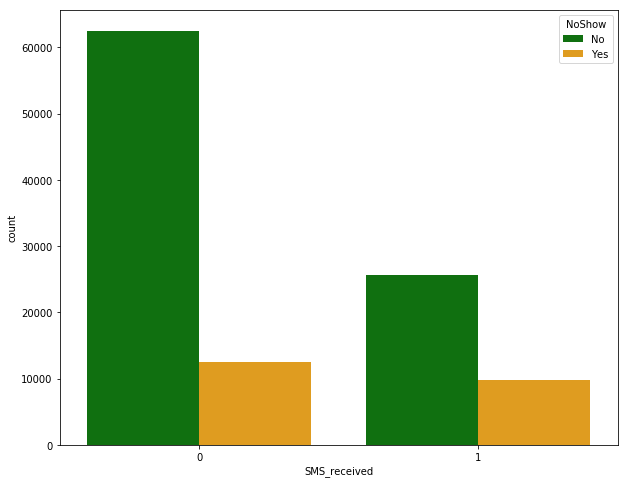

In [151]:
plt.subplots(figsize=(10,8))
g = sns.countplot(x='SMS_received', hue='NoShow', palette=("g", "orange"), data=df)
plt.show()

And yes: Amongst all people who got a reminder the absolute count of No-Shows is lower compared to people who got no reminder. 

<a id='conclusions'></a>
## Conclusions

As I did not use any inferential statistics in my data analysis, so all my findings are clearly tentative.
* Unlike people with alcohol problems, patients with chronical illnesses as hypertension, diabetes and handicaps are more likely to commit to their appointments. 
* People suffering on alcoholism are less likely to commit to their appointment. It may be because they feel ashamed and are worried about being caught.
* As much more alcoholics are enrolled in the public welfare system than the average and therefore are costly, options should be considered to make them more committed and help them to get back on track.
* Older people tend to be more commited to their appointments than younger adults. The No-Show rate of young adults is highest, those of minors is close. This may be due to the fact that the minors belong to the young adults and therefore are dependent on their parents to show up to an appointment.
* A quick glance was made to the impact of a reminder via sms and it looked as if this could increase the commitment to an appointment.